# Project Title: Clean and Preprocess Netflix Dataset

## Introduction
This notebook aims to clean and preprocess the netflix dataset

Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

Increasing the column width to see the output 
of the DataFrame clearly

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

### Data Loading and Initial Exploration

In [3]:
# Loading the dataset 
df = pd.read_csv('netflix_titles.csv')

In [4]:
print(df.head())

  show_id     type                  title         director                                               cast        country          date_added  release_year rating   duration                                          listed_in                                        description
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson                                                NaN  United States  September 25, 2021          2020  PG-13     90 min                                      Documentaries  As her father nears the end of his life, filmm...
1      s2  TV Show          Blood & Water              NaN  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa  September 24, 2021          2021  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries  After crossing paths at a party, a Cape Town t...
2      s3  TV Show              Ganglands  Julien Leclercq  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN  September 24, 2021          2021  TV-

In [5]:
print(df.tail())

     show_id     type        title         director                                               cast        country         date_added  release_year rating   duration                                       listed_in                                        description
8802   s8803    Movie       Zodiac    David Fincher  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States  November 20, 2019          2007      R    158 min                  Cult Movies, Dramas, Thrillers  A political cartoonist, a crime reporter and a...
8803   s8804  TV Show  Zombie Dumb              NaN                                                NaN            NaN       July 1, 2019          2018  TV-Y7  2 Seasons          Kids' TV, Korean TV Shows, TV Comedies  While living alone in a spooky town, a young g...
8804   s8805    Movie   Zombieland  Ruben Fleischer  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   November 1, 2019          2009      R     88 min                         Com

In [6]:
print(df.info(show_counts=True)) # show_counts=True gives the Non-Null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [7]:
# Checking null counts
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Making the null values heatmap visualization before handling them
otherwise we wouldn't be able to see them

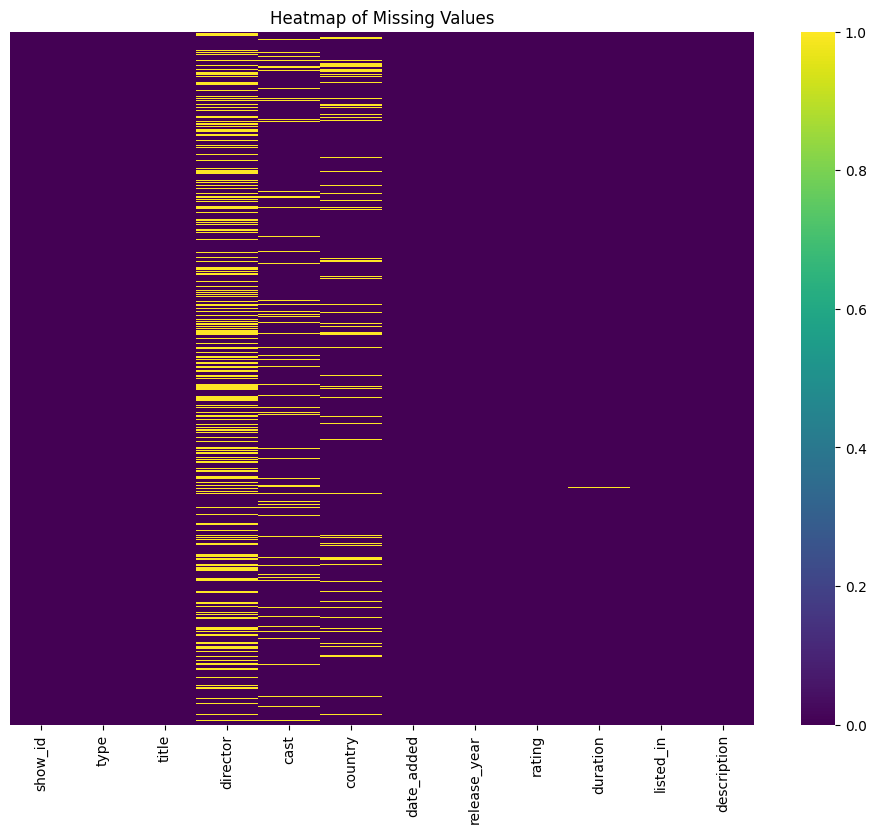

In [8]:
# Visuaizing null values distributions using heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(data=df.isnull(), cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [9]:
print(f"No. of duplicates: {df.duplicated().sum()}")

# if duplicates are found
# df = df.drop_duplicates()

No. of duplicates: 0


Handling missing values


In [10]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [11]:
# Checking null counts
print(df.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


In [12]:
# Converting date_added to datetime
df['date_added'] = df['date_added'].astype(str).str.strip()               
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Handling missing values for date_added
df['date_added'] = df['date_added'].fillna(
    pd.to_datetime(df['release_year'].astype(str) + '-01-01')
)

# Extracting year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [13]:
# Extracting information from duration column
df['duration_int'] = df['duration'].astype(str).str.extract(r'(\d+)').astype('float64')
df['duration_type'] = df['duration'].astype(str).str.extract('([a-zA-Z]+)').fillna('Unknown')

In [14]:
# Finding the no of years since the release of the movie for the current year
current_year = 2025
df['years_since_release'] = current_year - df['release_year']

In [15]:
# Checking the changes made 
print(df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   show_id              8807 non-null   object        
 1   type                 8807 non-null   object        
 2   title                8807 non-null   object        
 3   director             8807 non-null   object        
 4   cast                 8807 non-null   object        
 5   country              8807 non-null   object        
 6   date_added           8807 non-null   datetime64[ns]
 7   release_year         8807 non-null   int64         
 8   rating               8807 non-null   object        
 9   duration             8807 non-null   object        
 10  listed_in            8807 non-null   object        
 11  description          8807 non-null   object        
 12  year_added           8807 non-null   int32         
 13  month_added          8807 non-nul

In [16]:
# Finding top 10 countries with most shows
top_countries = df['country'].value_counts().head(10)
print(f"\n\nTop 10 Countries with most shows:\n{top_countries}")



Top 10 Countries with most shows:
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


In [17]:
# recently added shows
recent_shows = df.sort_values(by='date_added', ascending=False)
print(f"\n\nRecently added shows:\n{recent_shows}")



Recently added shows:
     show_id     type                                title                       director                                               cast         country date_added  release_year rating    duration                                          listed_in                                        description  year_added  month_added  duration_int duration_type  years_since_release
0         s1    Movie                 Dick Johnson Is Dead                Kirsten Johnson                                            Unknown   United States 2021-09-25          2020  PG-13      90 min                                      Documentaries  As her father nears the end of his life, filmm...        2021            9          90.0           min                    5
6         s7    Movie     My Little Pony: A New Generation  Robert Cullen, José Luis Ucha  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...         Unknown 2021-09-24          2021     PG      91 min                      

In [18]:
# grouping by content type
grouped_content = df.groupby('type')['show_id'].count()
print(f"\n\nGrouping shows by content type:\n{grouped_content}")



Grouping shows by content type:
type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64


In [19]:
# Statistical summary for Numerical columns
print(df.describe())

                          date_added  release_year   year_added  month_added  duration_int  years_since_release
count                           8807   8807.000000  8807.000000  8807.000000   8807.000000          8807.000000
mean   2019-05-13 21:37:54.781423872   2014.180198  2018.863291     6.648575     69.823436            10.819802
min              2003-01-01 00:00:00   1925.000000  2003.000000     1.000000      1.000000             4.000000
25%              2018-04-03 00:00:00   2013.000000  2018.000000     4.000000      2.000000             6.000000
50%              2019-07-01 00:00:00   2017.000000  2019.000000     7.000000     88.000000             8.000000
75%              2020-08-18 00:00:00   2019.000000  2020.000000    10.000000    106.000000            12.000000
max              2021-09-25 00:00:00   2021.000000  2021.000000    12.000000    312.000000           100.000000
std                              NaN      8.819312     1.602696     3.439879     50.822055             8

In [20]:
# Statistical summary for Categorical columns
print(df.describe(include='object'))

       show_id   type                 title director     cast        country rating  duration                     listed_in                                        description duration_type
count     8807   8807                  8807     8807     8807           8807   8807      8807                          8807                                               8807          8807
unique    8807      2                  8807     4529     7693            749     17       220                           514                                               8775             3
top         s1  Movie  Dick Johnson Is Dead  Unknown  Unknown  United States  TV-MA  1 Season  Dramas, International Movies  Paranormal activity at a lush, abandoned prope...           min
freq         1   6131                     1     2634      825           2818   3211      1796                           362                                                  4          6128


## Visualizations of the pre-processed dataset

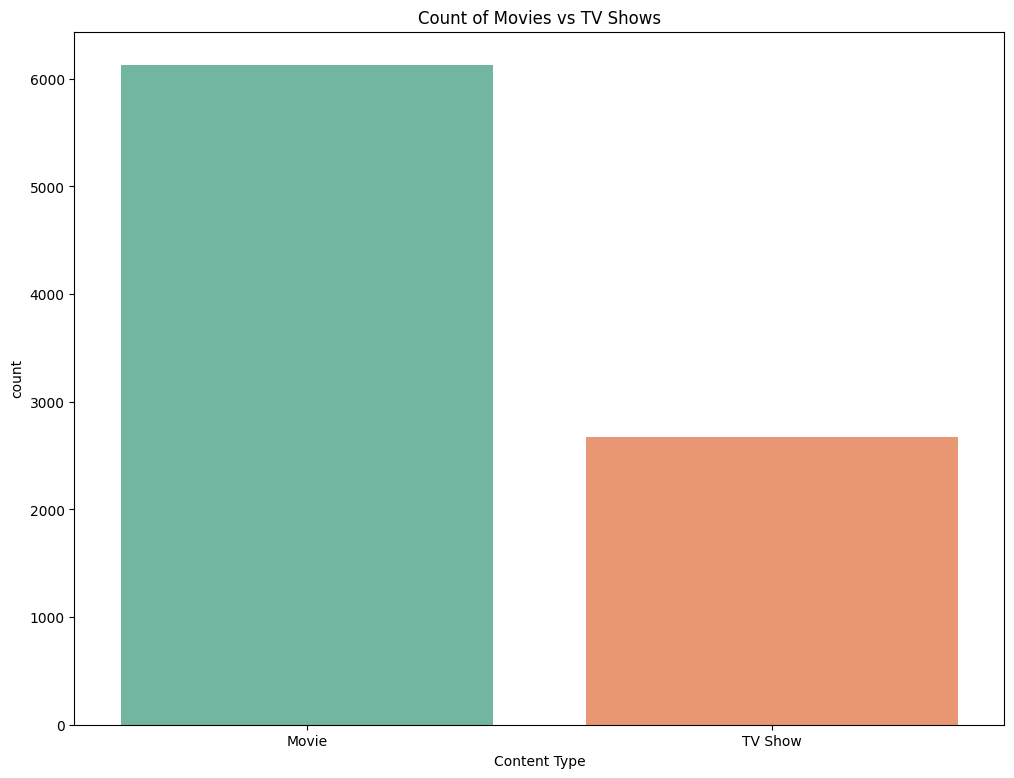

In [21]:
# Count of Movies against TV Shows
plt.figure(figsize=(12, 9))
sns.countplot(data=df, x='type', hue='type', palette='Set2')
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Content Type")
plt.show()

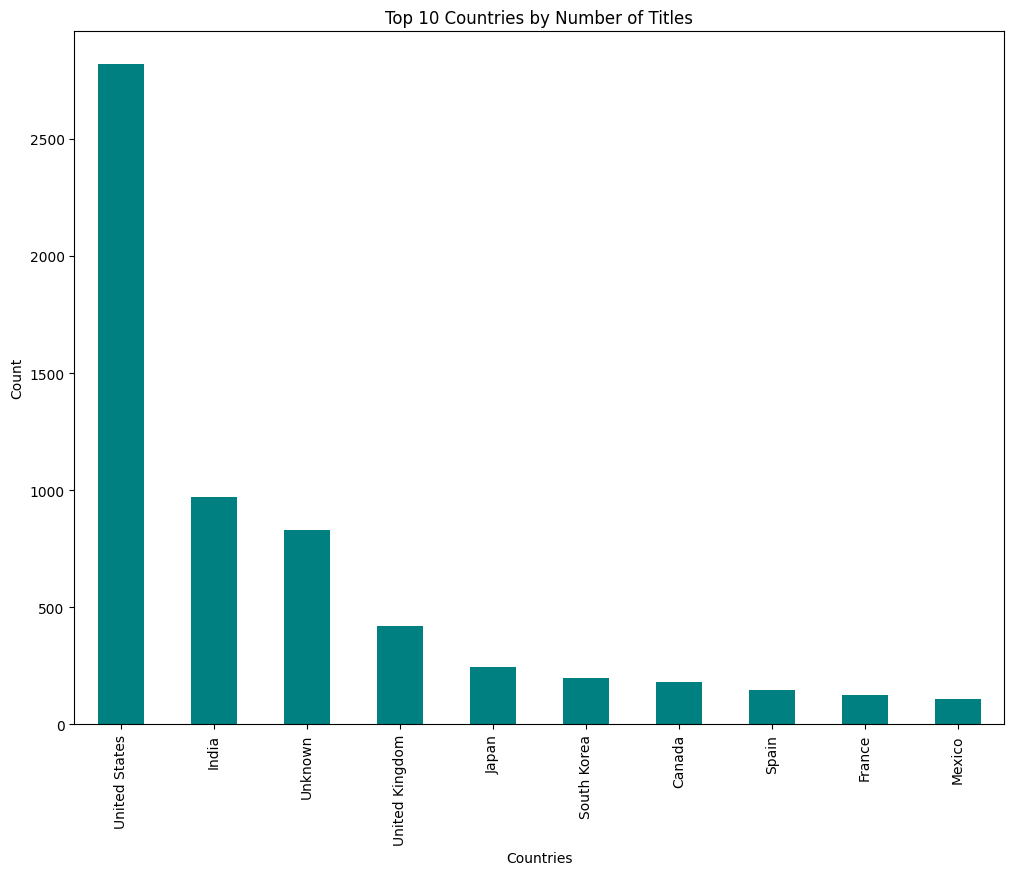

In [22]:
# Bar plot for Top 10 countries by Title Count
top_countries.plot(kind='bar', figsize=(12, 9), color='teal')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.show()

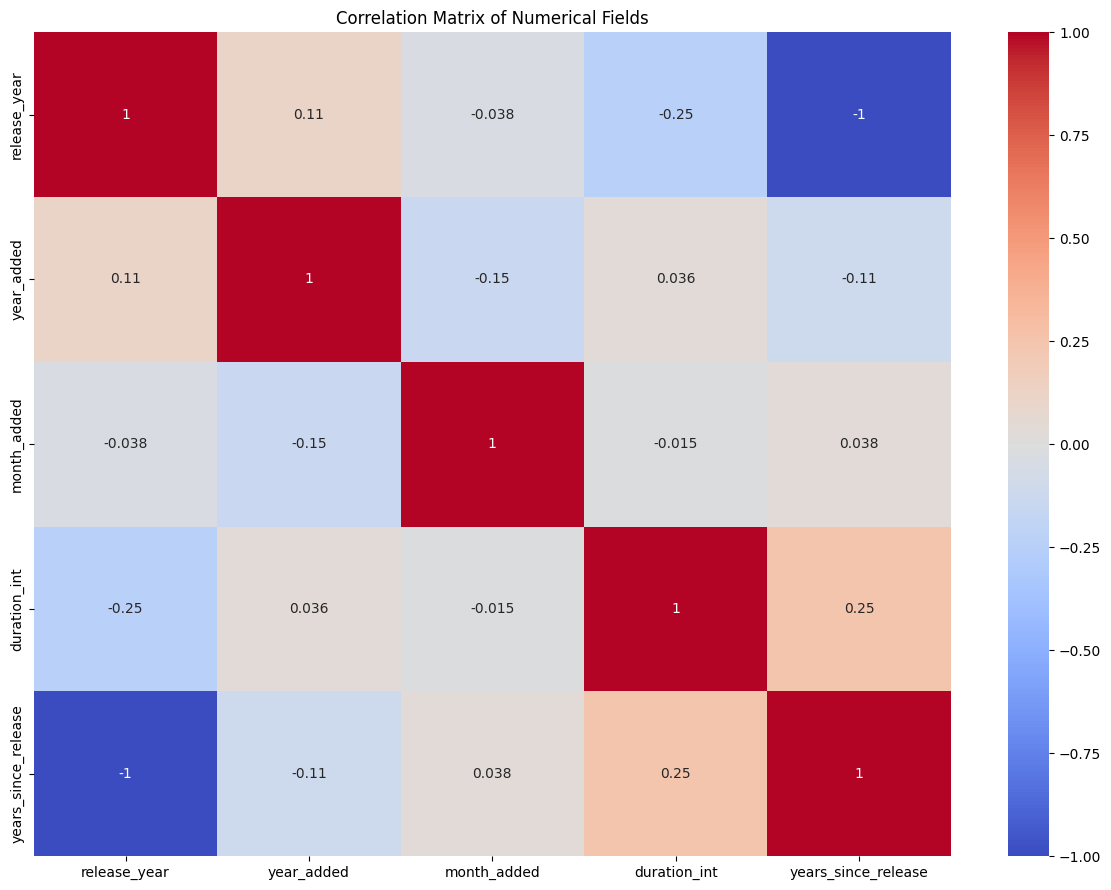

In [23]:
# Correlation heatmap of numerical columns
numerical_cols = df[['release_year', 'year_added', 'month_added', 'duration_int', 'years_since_release']]

plt.figure(figsize=(12, 9))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Fields")
plt.tight_layout()
plt.show()

In [ ]:
# Label Encoding before ML model training
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])
df['rating_encoded'] = le.fit_transform(df['rating'])
df['duration_type_encoded'] = le.fit_transform(df['duration_type'])

In [25]:
# Checking the label encoded columns
print(df.head())

  show_id     type                  title         director                                               cast        country date_added  release_year rating   duration                                          listed_in                                        description  year_added  month_added  duration_int duration_type  years_since_release  type_encoded  rating_encoded  duration_type_encoded
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson                                            Unknown  United States 2021-09-25          2020  PG-13     90 min                                      Documentaries  As her father nears the end of his life, filmm...        2021            9          90.0           min                    5             0               7                      2
1      s2  TV Show          Blood & Water          Unknown  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 2021-09-24          2021  TV-MA  2 Seasons    International TV Shows, TV Dramas, 

Saving the cleaned and pre-processed netflix dataset to a csv file

In [27]:
df.to_csv("netflix_clean.csv", index=False)